In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

 # 載入資料與資料清理

In [2]:
nba_df = pd.DataFrame([])
for year in range(2014,2022):
    nba_df = pd.concat([nba_df,pd.read_csv(f"NBA_DATA3-5/{year}_TeamGameStats.csv")],ignore_index=True)
print(nba_df.shape)
nba_df.sample(5)

(16814, 119)


,gmDate,gmTime,seasType,offLNm1,offFNm1,offLNm2,offFNm2,OffLNm3,offFNm3,teamAbbr,...,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay_RATE,opptAR,opptASTDividedByTO,opptSTLDividedByTO,opptFouls
3193,2015/12/18,22:30,Regular,NaN,NaN,NaN,NaN,NaN,NaN,Golden State Warriors,...,NaN,NaN,111.2,120.1,NaN,NaN,NaN,1.56,37.50,29
9161,2018/03/09,19:30,Regular,NaN,NaN,NaN,NaN,NaN,NaN,Toronto Raptors,...,NaN,NaN,111.9,115.1,NaN,NaN,NaN,1.15,69.23,13
14576,2021/02/06,20:00,Regular,NaN,NaN,NaN,NaN,NaN,NaN,San Antonio Spurs,...,NaN,NaN,102.9,107.8,NaN,NaN,NaN,1.75,41.67,25
9824,2018/10/31,22:30,Regular,NaN,NaN,NaN,NaN,NaN,NaN,San Antonio Spurs,...,NaN,NaN,88.2,117.6,NaN,NaN,NaN,1.40,66.67,26
9990,2018/11/12,20:00,Regular,NaN,NaN,NaN,NaN,NaN,NaN,Dallas Mavericks,...,NaN,NaN,94.2,99.0,NaN,NaN,NaN,0.94,64.71,26


In [3]:
# 刪除空的資料
cols_with_missing = [col for col in nba_df.columns if nba_df[col].isnull().any()]
nba_df.drop(cols_with_missing, axis=1, inplace=True)
nba_df

,gmDate,gmTime,seasType,teamAbbr,teamLoc,teamRslt,teamMin,teamPTS,teamAST,teamTO,...,opptOREB_RATE,opptDREB_RATE,opptTO_RATE,opptSTL_RATE,opptBLK_RATE,opptOrtg,opptDrtg,opptASTDividedByTO,opptSTLDividedByTO,opptFouls
0,2014/10/28,20:00,Regular,Orlando Magic,Away,Loss,240,84,17,18,...,39.4,69.2,7.3,10.5,23.3,106.1,88.2,2.22,111.11,17
1,2014/10/28,20:00,Regular,New Orleans Pelicans,Home,Win,240,101,20,9,...,30.8,60.6,16.2,5.3,10.7,88.2,106.1,0.94,27.78,25
2,2014/10/28,20:00,Regular,Dallas Mavericks,Away,Loss,240,100,17,10,...,27.3,76.3,20.6,5.8,5.3,117.3,116.1,1.15,25.00,20
3,2014/10/28,20:00,Regular,San Antonio Spurs,Home,Win,240,101,23,20,...,23.7,72.7,10.4,10.5,7.1,116.1,117.3,1.70,90.00,20
4,2014/10/28,22:30,Regular,Houston Rockets,Away,Win,240,108,22,13,...,25.0,64.1,10.3,7.7,6.8,99.0,118.8,1.45,63.64,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16809,2022/01/03,22:00,Regular,Portland Trail Blazers,Home,Win,240,136,29,9,...,23.7,71.4,10.9,6.1,2.1,133.8,138.9,2.58,50.00,24
16810,2022/01/03,22:30,Regular,Minnesota Timberwolves,Away,Win,240,122,34,17,...,12.1,71.1,19.0,12.0,6.3,104.1,122.2,1.10,60.00,10
16811,2022/01/03,22:30,Regular,Los Angeles Clippers,Home,Loss,240,104,22,20,...,28.9,87.9,14.9,9.0,8.7,122.2,104.1,2.00,52.94,14
16812,2022/01/04,19:00,Regular,Memphis Grizzlies,Away,Win,240,110,21,9,...,29.8,74.5,9.8,2.1,9.5,111.9,116.1,2.55,18.18,14


In [4]:
# 刪除不相關的資料
cols_with_irrelevant = ['seasType','teamMin','opptLoc','opptRslt','opptMin']
nba_df.drop(cols_with_irrelevant, axis=1, inplace=True)
nba_df

,gmDate,gmTime,teamAbbr,teamLoc,teamRslt,teamPTS,teamAST,teamTO,teamSTL,teamBLK,...,opptOREB_RATE,opptDREB_RATE,opptTO_RATE,opptSTL_RATE,opptBLK_RATE,opptOrtg,opptDrtg,opptASTDividedByTO,opptSTLDividedByTO,opptFouls
0,2014/10/28,20:00,Orlando Magic,Away,Loss,84,17,18,5,9,...,39.4,69.2,7.3,10.5,23.3,106.1,88.2,2.22,111.11,17
1,2014/10/28,20:00,New Orleans Pelicans,Home,Win,101,20,9,10,17,...,30.8,60.6,16.2,5.3,10.7,88.2,106.1,0.94,27.78,25
2,2014/10/28,20:00,Dallas Mavericks,Away,Loss,100,17,10,9,3,...,27.3,76.3,20.6,5.8,5.3,117.3,116.1,1.15,25.00,20
3,2014/10/28,20:00,San Antonio Spurs,Home,Win,101,23,20,5,3,...,23.7,72.7,10.4,10.5,7.1,116.1,117.3,1.70,90.00,20
4,2014/10/28,22:30,Houston Rockets,Away,Win,108,22,13,7,3,...,25.0,64.1,10.3,7.7,6.8,99.0,118.8,1.45,63.64,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16809,2022/01/03,22:00,Portland Trail Blazers,Home,Win,136,29,9,10,3,...,23.7,71.4,10.9,6.1,2.1,133.8,138.9,2.58,50.00,24
16810,2022/01/03,22:30,Minnesota Timberwolves,Away,Win,122,34,17,9,4,...,12.1,71.1,19.0,12.0,6.3,104.1,122.2,1.10,60.00,10
16811,2022/01/03,22:30,Los Angeles Clippers,Home,Loss,104,22,20,12,3,...,28.9,87.9,14.9,9.0,8.7,122.2,104.1,2.00,52.94,14
16812,2022/01/04,19:00,Memphis Grizzlies,Away,Win,110,21,9,6,8,...,29.8,74.5,9.8,2.1,9.5,111.9,116.1,2.55,18.18,14


In [5]:
# 離散資料轉連續數值

nba_df['teamLoc'] = nba_df['teamLoc'].replace(['Home', 'Away'], [1,0]).astype(str).astype(int)
nba_df['teamRslt'] = nba_df['teamRslt'].replace(['Win', 'Loss'], [1,0]).astype(str).astype(int)
nba_df

,gmDate,gmTime,teamAbbr,teamLoc,teamRslt,teamPTS,teamAST,teamTO,teamSTL,teamBLK,...,opptOREB_RATE,opptDREB_RATE,opptTO_RATE,opptSTL_RATE,opptBLK_RATE,opptOrtg,opptDrtg,opptASTDividedByTO,opptSTLDividedByTO,opptFouls
0,2014/10/28,20:00,Orlando Magic,0,0,84,17,18,5,9,...,39.4,69.2,7.3,10.5,23.3,106.1,88.2,2.22,111.11,17
1,2014/10/28,20:00,New Orleans Pelicans,1,1,101,20,9,10,17,...,30.8,60.6,16.2,5.3,10.7,88.2,106.1,0.94,27.78,25
2,2014/10/28,20:00,Dallas Mavericks,0,0,100,17,10,9,3,...,27.3,76.3,20.6,5.8,5.3,117.3,116.1,1.15,25.00,20
3,2014/10/28,20:00,San Antonio Spurs,1,1,101,23,20,5,3,...,23.7,72.7,10.4,10.5,7.1,116.1,117.3,1.70,90.00,20
4,2014/10/28,22:30,Houston Rockets,0,1,108,22,13,7,3,...,25.0,64.1,10.3,7.7,6.8,99.0,118.8,1.45,63.64,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16809,2022/01/03,22:00,Portland Trail Blazers,1,1,136,29,9,10,3,...,23.7,71.4,10.9,6.1,2.1,133.8,138.9,2.58,50.00,24
16810,2022/01/03,22:30,Minnesota Timberwolves,0,1,122,34,17,9,4,...,12.1,71.1,19.0,12.0,6.3,104.1,122.2,1.10,60.00,10
16811,2022/01/03,22:30,Los Angeles Clippers,1,0,104,22,20,12,3,...,28.9,87.9,14.9,9.0,8.7,122.2,104.1,2.00,52.94,14
16812,2022/01/04,19:00,Memphis Grizzlies,0,1,110,21,9,6,8,...,29.8,74.5,9.8,2.1,9.5,111.9,116.1,2.55,18.18,14


In [6]:
#因為一場比賽被劃分成兩筆，所以只取前面為主場那筆
nba_df = nba_df[nba_df.teamLoc == 1].reset_index()
del nba_df['index']
nba_df

,gmDate,gmTime,teamAbbr,teamLoc,teamRslt,teamPTS,teamAST,teamTO,teamSTL,teamBLK,...,opptOREB_RATE,opptDREB_RATE,opptTO_RATE,opptSTL_RATE,opptBLK_RATE,opptOrtg,opptDrtg,opptASTDividedByTO,opptSTLDividedByTO,opptFouls
0,2014/10/28,20:00,New Orleans Pelicans,1,1,101,20,9,10,17,...,30.8,60.6,16.2,5.3,10.7,88.2,106.1,0.94,27.78,25
1,2014/10/28,20:00,San Antonio Spurs,1,1,101,23,20,5,3,...,23.7,72.7,10.4,10.5,7.1,116.1,117.3,1.70,90.00,20
2,2014/10/28,22:30,Los Angeles Lakers,1,0,90,16,11,7,3,...,35.9,75.0,12.0,7.7,4.3,118.8,99.0,1.69,53.85,30
3,2014/10/29,19:00,Charlotte Hornets,1,1,108,27,10,8,9,...,7.9,68.1,13.4,8.9,12.5,104.8,106.8,1.79,64.29,25
4,2014/10/29,19:00,Indiana Pacers,1,1,103,22,17,5,13,...,29.4,65.9,9.7,10.6,8.9,96.7,109.5,1.55,90.91,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,2022/01/03,20:30,Dallas Mavericks,1,1,103,23,11,12,5,...,32.4,87.8,23.9,6.6,2.4,97.3,112.6,0.84,24.00,24
8403,2022/01/03,22:00,Golden State Warriors,1,1,115,39,12,11,6,...,23.4,84.4,15.5,4.9,3.7,106.0,112.9,1.33,27.78,13
8404,2022/01/03,22:00,Portland Trail Blazers,1,1,136,29,9,10,3,...,23.7,71.4,10.9,6.1,2.1,133.8,138.9,2.58,50.00,24
8405,2022/01/03,22:30,Los Angeles Clippers,1,0,104,22,20,12,3,...,28.9,87.9,14.9,9.0,8.7,122.2,104.1,2.00,52.94,14


In [7]:
# 更改欄位名稱
nba_df.columns = nba_df.columns.str.replace('team', 'home')
nba_df.columns = nba_df.columns.str.replace('oppt', 'away')
nba_df.drop(['homeLoc'],inplace=True,axis=1)
nba_df

,gmDate,gmTime,homeAbbr,homeRslt,homePTS,homeAST,homeTO,homeSTL,homeBLK,homeFGA,...,awayOREB_RATE,awayDREB_RATE,awayTO_RATE,awaySTL_RATE,awayBLK_RATE,awayOrtg,awayDrtg,awayASTDividedByTO,awaySTLDividedByTO,awayFouls
0,2014/10/28,20:00,New Orleans Pelicans,1,101,20,9,10,17,101,...,30.8,60.6,16.2,5.3,10.7,88.2,106.1,0.94,27.78,25
1,2014/10/28,20:00,San Antonio Spurs,1,101,23,20,5,3,70,...,23.7,72.7,10.4,10.5,7.1,116.1,117.3,1.70,90.00,20
2,2014/10/28,22:30,Los Angeles Lakers,0,90,16,11,7,3,79,...,35.9,75.0,12.0,7.7,4.3,118.8,99.0,1.69,53.85,30
3,2014/10/29,19:00,Charlotte Hornets,1,108,27,10,8,9,101,...,7.9,68.1,13.4,8.9,12.5,104.8,106.8,1.79,64.29,25
4,2014/10/29,19:00,Indiana Pacers,1,103,22,17,5,13,81,...,29.4,65.9,9.7,10.6,8.9,96.7,109.5,1.55,90.91,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,2022/01/03,20:30,Dallas Mavericks,1,103,23,11,12,5,78,...,32.4,87.8,23.9,6.6,2.4,97.3,112.6,0.84,24.00,24
8403,2022/01/03,22:00,Golden State Warriors,1,115,39,12,11,6,92,...,23.4,84.4,15.5,4.9,3.7,106.0,112.9,1.33,27.78,13
8404,2022/01/03,22:00,Portland Trail Blazers,1,136,29,9,10,3,89,...,23.7,71.4,10.9,6.1,2.1,133.8,138.9,2.58,50.00,24
8405,2022/01/03,22:30,Los Angeles Clippers,0,104,22,20,12,3,78,...,28.9,87.9,14.9,9.0,8.7,122.2,104.1,2.00,52.94,14


# 特徵工程

In [8]:
# Player efficiency rating 績效指數評級 (PIR) 是一個總體績效指標。

homePIR = ((nba_df['homePTS'] + nba_df['homeTRB'] + nba_df['homeAST']
            + nba_df['homeSTL'] + nba_df['homeBLK'] + nba_df['awayFouls'])
           # Missed Field Goals:
           - ((nba_df['homeFGA']- nba_df['homeFGM'])
              # Missed Free Throws:
              +(nba_df['homeFTA'] - nba_df['homeFTM'])
              + nba_df['homeTO'] + nba_df['awayBLK'] + nba_df['homeFouls']))

awayPIR = ((nba_df['awayPTS'] + nba_df['awayTRB'] + nba_df['awayAST']
            + nba_df['awaySTL'] + nba_df['awayBLK'] + nba_df['homeFouls'])
           # Missed Field Goals:
           - ((nba_df['awayFGA']- nba_df['awayFGM'])
              # Missed Free Throws:
              +(nba_df['awayFTA'] - nba_df['awayFTM'])
              + nba_df['awayTO'] + nba_df['homeBLK'] + nba_df['awayFouls']))

nba_df['homePIR'] = pd.Series(homePIR)
nba_df['awayPIR'] = pd.Series(awayPIR)
nba_df

,gmDate,gmTime,homeAbbr,homeRslt,homePTS,homeAST,homeTO,homeSTL,homeBLK,homeFGA,...,awayTO_RATE,awaySTL_RATE,awayBLK_RATE,awayOrtg,awayDrtg,awayASTDividedByTO,awaySTLDividedByTO,awayFouls,homePIR,awayPIR
0,2014/10/28,20:00,New Orleans Pelicans,1,101,20,9,10,17,101,...,16.2,5.3,10.7,88.2,106.1,0.94,27.78,25,124,71
1,2014/10/28,20:00,San Antonio Spurs,1,101,23,20,5,3,70,...,10.4,10.5,7.1,116.1,117.3,1.70,90.00,20,111,106
2,2014/10/28,22:30,Los Angeles Lakers,0,90,16,11,7,3,79,...,12.0,7.7,4.3,118.8,99.0,1.69,53.85,30,77,115
3,2014/10/29,19:00,Charlotte Hornets,1,108,27,10,8,9,101,...,13.4,8.9,12.5,104.8,106.8,1.79,64.29,25,118,113
4,2014/10/29,19:00,Indiana Pacers,1,103,22,17,5,13,81,...,9.7,10.6,8.9,96.7,109.5,1.55,90.91,29,124,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,2022/01/03,20:30,Dallas Mavericks,1,103,23,11,12,5,78,...,23.9,6.6,2.4,97.3,112.6,0.84,24.00,24,117,87
8403,2022/01/03,22:00,Golden State Warriors,1,115,39,12,11,6,92,...,15.5,4.9,3.7,106.0,112.9,1.33,27.78,13,147,113
8404,2022/01/03,22:00,Portland Trail Blazers,1,136,29,9,10,3,89,...,10.9,6.1,2.1,133.8,138.9,2.58,50.00,24,168,145
8405,2022/01/03,22:30,Los Angeles Clippers,0,104,22,20,12,3,78,...,14.9,9.0,8.7,122.2,104.1,2.00,52.94,14,111,140


In [9]:
# 判斷是否為明星賽前後

nba_df['gmDate'] = pd.to_datetime(nba_df['gmDate'], errors='coerce')
nba_df['year'] = nba_df['gmDate'].dt.year
nba_df['month'] = nba_df['gmDate'].dt.month

def seasons(d):
    y=d[0]
    m=d[1]

    if (y ==2014 and m in (10,11,12)) or (y==2015 and m in (1,2,3,4)):
        s=1
    elif (y==2015 and m in (10,11,12)) or (y==2016 and m in (1,2,3,4)):
        s=2
    elif (y==2016 and m in (10,11,12)) or (y==2017 and m in (1,2,3,4)):
        s=3
    elif (y==2017 and m in (10,11,12)) or (y==2018 and m in (1,2,3,4)):
        s=4
    elif (y==2018 and m in (10,11,12)) or (y==2019 and m in (1,2,3,4)):
        s=5
    elif (y==2019 and m in (10,11,12)) or (y==2020 and m in (1,2,3,4)):
        s=6
    elif (y==2020 and m in (10,11,12)) or (y==2021 and m in (1,2,3,4)):
        s=7
    else:
        s=8
    return s

nba_df['Season'] = nba_df[['year','month']].apply(seasons,axis=1)

In [10]:
def halfs(x):
    if x in (10,11,12,1):
        x = 'Pre_AllStar'
    else:
        x = 'Post_AllStar'
    return (x)

nba_df['Season_half']=nba_df['month'].apply(halfs)
nba_df

,gmDate,gmTime,homeAbbr,homeRslt,homePTS,homeAST,homeTO,homeSTL,homeBLK,homeFGA,...,awayDrtg,awayASTDividedByTO,awaySTLDividedByTO,awayFouls,homePIR,awayPIR,year,month,Season,Season_half
0,2014-10-28,20:00,New Orleans Pelicans,1,101,20,9,10,17,101,...,106.1,0.94,27.78,25,124,71,2014,10,1,Pre_AllStar
1,2014-10-28,20:00,San Antonio Spurs,1,101,23,20,5,3,70,...,117.3,1.70,90.00,20,111,106,2014,10,1,Pre_AllStar
2,2014-10-28,22:30,Los Angeles Lakers,0,90,16,11,7,3,79,...,99.0,1.69,53.85,30,77,115,2014,10,1,Pre_AllStar
3,2014-10-29,19:00,Charlotte Hornets,1,108,27,10,8,9,101,...,106.8,1.79,64.29,25,118,113,2014,10,1,Pre_AllStar
4,2014-10-29,19:00,Indiana Pacers,1,103,22,17,5,13,81,...,109.5,1.55,90.91,29,124,68,2014,10,1,Pre_AllStar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,2022-01-03,20:30,Dallas Mavericks,1,103,23,11,12,5,78,...,112.6,0.84,24.00,24,117,87,2022,1,8,Pre_AllStar
8403,2022-01-03,22:00,Golden State Warriors,1,115,39,12,11,6,92,...,112.9,1.33,27.78,13,147,113,2022,1,8,Pre_AllStar
8404,2022-01-03,22:00,Portland Trail Blazers,1,136,29,9,10,3,89,...,138.9,2.58,50.00,24,168,145,2022,1,8,Pre_AllStar
8405,2022-01-03,22:30,Los Angeles Clippers,0,104,22,20,12,3,78,...,104.1,2.00,52.94,14,111,140,2022,1,8,Pre_AllStar


In [11]:
# 總得分差
nba_df['diffPTS']=abs(nba_df['homePTS']-nba_df['awayPTS'])
nba_df

,gmDate,gmTime,homeAbbr,homeRslt,homePTS,homeAST,homeTO,homeSTL,homeBLK,homeFGA,...,awayASTDividedByTO,awaySTLDividedByTO,awayFouls,homePIR,awayPIR,year,month,Season,Season_half,diffPTS
0,2014-10-28,20:00,New Orleans Pelicans,1,101,20,9,10,17,101,...,0.94,27.78,25,124,71,2014,10,1,Pre_AllStar,17
1,2014-10-28,20:00,San Antonio Spurs,1,101,23,20,5,3,70,...,1.70,90.00,20,111,106,2014,10,1,Pre_AllStar,1
2,2014-10-28,22:30,Los Angeles Lakers,0,90,16,11,7,3,79,...,1.69,53.85,30,77,115,2014,10,1,Pre_AllStar,18
3,2014-10-29,19:00,Charlotte Hornets,1,108,27,10,8,9,101,...,1.79,64.29,25,118,113,2014,10,1,Pre_AllStar,2
4,2014-10-29,19:00,Indiana Pacers,1,103,22,17,5,13,81,...,1.55,90.91,29,124,68,2014,10,1,Pre_AllStar,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,2022-01-03,20:30,Dallas Mavericks,1,103,23,11,12,5,78,...,0.84,24.00,24,117,87,2022,1,8,Pre_AllStar,14
8403,2022-01-03,22:00,Golden State Warriors,1,115,39,12,11,6,92,...,1.33,27.78,13,147,113,2022,1,8,Pre_AllStar,7
8404,2022-01-03,22:00,Portland Trail Blazers,1,136,29,9,10,3,89,...,2.58,50.00,24,168,145,2022,1,8,Pre_AllStar,5
8405,2022-01-03,22:30,Los Angeles Clippers,0,104,22,20,12,3,78,...,2.00,52.94,14,111,140,2022,1,8,Pre_AllStar,18


In [12]:
# 紀錄主客隊場次
team_games = {}
for index, row in nba_df[['homeAbbr','Season']].groupby(['homeAbbr','Season']).size().reset_index().sort_values(by=['homeAbbr','Season'])[:].iterrows():
    team_games[f"{row['homeAbbr']},{row['Season']}"] = 1
home_games = []
away_games = []
for index, row in nba_df.iterrows():

    home_games.append(team_games[f"{row['homeAbbr']},{row['Season']}"])
    team_games[f"{row['homeAbbr']},{row['Season']}"] = team_games[f"{row['homeAbbr']},{row['Season']}"]+1

    away_games.append(team_games[f"{row['awayAbbr']},{row['Season']}"])
    team_games[f"{row['awayAbbr']},{row['Season']}"] = team_games[f"{row['awayAbbr']},{row['Season']}"]+1

nba_df['home_games'] = pd.Series(home_games)
nba_df['away_games'] = pd.Series(away_games)
nba_df[(nba_df.homeAbbr=='New York Knicks')|(nba_df.awayAbbr=='New York Knicks')][['gmDate','homeAbbr','home_games','awayAbbr','away_games']]

,gmDate,homeAbbr,home_games,awayAbbr,away_games
8,2014-10-29,New York Knicks,1,Chicago Bulls,1
16,2014-10-30,Cleveland Cavaliers,1,New York Knicks,2
40,2014-11-02,New York Knicks,3,Charlotte Hornets,3
50,2014-11-04,New York Knicks,4,Washington Wizards,4
60,2014-11-05,Detroit Pistons,4,New York Knicks,5
...,...,...,...,...,...
8334,2021-12-25,New York Knicks,33,Atlanta Hawks,32
8358,2021-12-28,Minnesota Timberwolves,34,New York Knicks,34
8362,2021-12-29,Detroit Pistons,33,New York Knicks,35
8380,2021-12-31,Oklahoma City Thunder,35,New York Knicks,36


In [13]:
#DF for ML:
nba_df_for_ML = nba_df[['homeRslt','gmDate','gmTime','homeAbbr','home_games','awayAbbr','away_games','Season_half']].copy()
nba_df_for_ML

,homeRslt,gmDate,gmTime,homeAbbr,home_games,awayAbbr,away_games,Season_half
0,1,2014-10-28,20:00,New Orleans Pelicans,1,Orlando Magic,1,Pre_AllStar
1,1,2014-10-28,20:00,San Antonio Spurs,1,Dallas Mavericks,1,Pre_AllStar
2,0,2014-10-28,22:30,Los Angeles Lakers,1,Houston Rockets,1,Pre_AllStar
3,1,2014-10-29,19:00,Charlotte Hornets,1,Milwaukee Bucks,1,Pre_AllStar
4,1,2014-10-29,19:00,Indiana Pacers,1,Philadelphia 76ers,1,Pre_AllStar
...,...,...,...,...,...,...,...,...
8402,1,2022-01-03,20:30,Dallas Mavericks,37,Denver Nuggets,35,Pre_AllStar
8403,1,2022-01-03,22:00,Golden State Warriors,36,Miami Heat,38,Pre_AllStar
8404,1,2022-01-03,22:00,Portland Trail Blazers,36,Atlanta Hawks,36,Pre_AllStar
8405,0,2022-01-03,22:30,Los Angeles Clippers,38,Minnesota Timberwolves,37,Pre_AllStar


In [15]:
# 新增連勝特徵

team_streak_dict = {}
for index, row in nba_df[['homeAbbr','Season']].groupby(['homeAbbr','Season']).size().reset_index().sort_values(by=['homeAbbr','Season'])[:].iterrows():
    team_streak_dict[f"{row['homeAbbr']},{row['Season']}"] = 0


home_streaks = []
away_streaks= []
for index, row in nba_df.iterrows():

    home_streaks.append(team_streak_dict[f"{row['homeAbbr']},{row['Season']}"])
    away_streaks.append(team_streak_dict[f"{row['awayAbbr']},{row['Season']}"])

    if row['homeRslt'] == 1:
        team_streak_dict[f"{row['homeAbbr']},{row['Season']}"] = team_streak_dict[f"{row['homeAbbr']},{row['Season']}"]+1
        team_streak_dict[f"{row['awayAbbr']},{row['Season']}"] = 0
    else:
        team_streak_dict[f"{row['homeAbbr']},{row['Season']}"] = 0
        team_streak_dict[f"{row['awayAbbr']},{row['Season']}"] = team_streak_dict[f"{row['awayAbbr']},{row['Season']}"]+1

nba_df_for_ML['home_streak'] = pd.Series(home_streaks)
nba_df_for_ML['away_streak'] = pd.Series(away_streaks)

nba_df_for_ML[((nba_df_for_ML.homeAbbr=='Milwaukee Bucks')|(nba_df_for_ML.awayAbbr=='Milwaukee Bucks'))][['gmDate','gmTime','homeAbbr','home_games','home_streak','awayAbbr','away_games','away_streak']]

,gmDate,gmTime,homeAbbr,home_games,home_streak,awayAbbr,away_games,away_streak
3,2014-10-29,19:00,Charlotte Hornets,1,0,Milwaukee Bucks,1,0
22,2014-10-31,20:30,Milwaukee Bucks,2,0,Philadelphia 76ers,2,0
30,2014-11-01,19:00,Washington Wizards,3,1,Milwaukee Bucks,3,1
48,2014-11-04,19:00,Indiana Pacers,4,0,Milwaukee Bucks,4,0
61,2014-11-05,20:00,Milwaukee Bucks,5,1,Chicago Bulls,5,2
...,...,...,...,...,...,...,...,...
8335,2021-12-25,14:30,Milwaukee Bucks,35,2,Boston Celtics,33,1
8354,2021-12-28,19:00,Orlando Magic,35,0,Milwaukee Bucks,36,3
8371,2021-12-30,19:00,Orlando Magic,36,0,Milwaukee Bucks,37,4
8383,2022-01-01,18:30,Milwaukee Bucks,38,5,New Orleans Pelicans,36,1


In [16]:
# 新增前5場平均表現特徵
team_FiveLastGamesAvgDict = {}
for index, row in nba_df[['homeAbbr','Season']].groupby(['homeAbbr','Season']).size().reset_index().sort_values(by=['homeAbbr','Season'])[:].iterrows():
    team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"] = nba_df[((nba_df.homeAbbr==row['homeAbbr']) | (nba_df.awayAbbr==row['homeAbbr'])) & (nba_df.Season==row['Season'])]
    team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"].reset_index(drop=True,inplace=True)
    team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"]['games'] = pd.Series(list(range(len(team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"]))))+1


home_cols = ['homePIR','homePTS','homeFGA','homeFGM','homeFGM','home3PA','homeFTA','homeFTM','homeORB','homeDRB','homeAST','homeTO','homeSTL','homeBLK','homeFouls','diffPTS']
away_cols = ['awayPIR','awayPTS','awayFGA','awayFGM','awayFGM','away3PA','awayFTA','awayFTM','awayORB','awayDRB','awayAST','awayTO','awaySTL','awayBLK','awayFouls','diffPTS']

def five_last_games_avg(home_col,away_col):
    home_FiveLastGamesAvgDict = {}
    away_FiveLastGamesAvgDict = {}
    for index, row in nba_df.iterrows():

        if row['home_games'] > 5 :
            home_games =  row['home_games']
            sum = 0
            for idx5,row5 in  team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"].query(f'games>={home_games -5} & games<{home_games}').iterrows():
                if row['homeAbbr'] == row5['homeAbbr']:
                    sum+=row5[home_col]
                elif  row['homeAbbr'] == row5['awayAbbr']:
                    sum+=row5[away_col]
            home_FiveLastGamesAvgDict.update({index:sum/5})
        elif row['home_games'] <= 5 and row['home_games'] > 1:
            home_games =  row['home_games']
            sum = 0
            for idxX,rowX in  team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"].query(f'games>={home_games-(home_games -1)} & games<{home_games}').iterrows():
                if row['homeAbbr'] == rowX['homeAbbr']:
                    sum+=rowX[home_col]
                elif  row['homeAbbr'] == rowX['awayAbbr']:
                    sum+=rowX[away_col]
            home_FiveLastGamesAvgDict.update({index:sum/(home_games -1)})
        else:
            home_FiveLastGamesAvgDict.update({index:0})

        if row['away_games'] > 5 :
            away_games =  row['away_games']
            sum = 0
            for idx5,row5 in  team_FiveLastGamesAvgDict[f"{row['awayAbbr']},{row['Season']}"].query(f'games>={away_games -5} & games<{away_games}').iterrows():
                if row['awayAbbr'] == row5['homeAbbr']:
                    sum+=row5[home_col]
                elif  row['awayAbbr'] == row5['awayAbbr']:
                    sum+=row5[away_col]
            away_FiveLastGamesAvgDict.update({index:sum/5})
        elif row['away_games'] <= 5 and row['away_games'] > 1:
            away_games =  row['away_games']
            sum = 0
            for idxX,rowX in  team_FiveLastGamesAvgDict[f"{row['awayAbbr']},{row['Season']}"].query(f'games>={away_games -(away_games-1)} & games<{away_games}').iterrows():
                if row['awayAbbr'] == rowX['homeAbbr']:
                    sum+=rowX[home_col]
                elif  row['awayAbbr'] == rowX['awayAbbr']:
                    sum+=rowX[away_col]
            away_FiveLastGamesAvgDict.update({index:sum/(away_games-1)})
        else:
            away_FiveLastGamesAvgDict.update({index:0})

    if home_col=='diffPTS' or away_col=='diffPTS':
        home_col = f'home_{home_col}'
        away_col = f'away_{away_col}'

    nba_df_for_ML[f'home_avg_{home_col}'] = pd.Series(home_FiveLastGamesAvgDict)
    nba_df_for_ML[f'away_avg_{away_col}'] = pd.Series(away_FiveLastGamesAvgDict)

for home_col,away_col in zip(home_cols,away_cols):
    five_last_games_avg(home_col,away_col)

nba_df_for_ML

C:\Users\xin\AppData\Local\Temp/ipykernel_15548/1593516627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"]['games'] = pd.Series(list(range(len(team_FiveLastGamesAvgDict[f"{row['homeAbbr']},{row['Season']}"]))))+1


,homeRslt,gmDate,gmTime,homeAbbr,home_games,awayAbbr,away_games,Season_half,home_streak,away_streak,...,home_avg_homeTO,away_avg_awayTO,home_avg_homeSTL,away_avg_awaySTL,home_avg_homeBLK,away_avg_awayBLK,home_avg_homeFouls,away_avg_awayFouls,home_avg_home_diffPTS,away_avg_away_diffPTS
0,1,2014-10-28,20:00,New Orleans Pelicans,1,Orlando Magic,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2014-10-28,20:00,San Antonio Spurs,1,Dallas Mavericks,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2014-10-28,22:30,Los Angeles Lakers,1,Houston Rockets,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2014-10-29,19:00,Charlotte Hornets,1,Milwaukee Bucks,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2014-10-29,19:00,Indiana Pacers,1,Philadelphia 76ers,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,1,2022-01-03,20:30,Dallas Mavericks,37,Denver Nuggets,35,Pre_AllStar,2,3,...,12.8,14.6,6.8,8.2,4.4,4.4,21.4,20.4,9.0,8.2
8403,1,2022-01-03,22:00,Golden State Warriors,36,Miami Heat,38,Pre_AllStar,1,0,...,14.8,11.2,10.0,7.2,5.8,3.0,20.6,18.2,8.6,6.4
8404,1,2022-01-03,22:00,Portland Trail Blazers,36,Atlanta Hawks,36,Pre_AllStar,0,1,...,12.0,9.0,6.0,6.0,4.6,4.2,22.6,17.0,16.4,9.0
8405,0,2022-01-03,22:30,Los Angeles Clippers,38,Minnesota Timberwolves,37,Pre_AllStar,1,0,...,12.2,14.2,6.6,7.6,5.6,5.4,18.8,22.0,8.0,8.4


In [17]:
# 創建場比賽總分
nba_df_for_ML.homeRslt = nba_df.homePTS+nba_df.awayPTS
# 加總主客隊前五場得分
nba_df_for_ML['avg_PTS'] = nba_df_for_ML.home_avg_homePTS+nba_df_for_ML.away_avg_awayPTS
nba_df_for_ML

,homeRslt,gmDate,gmTime,homeAbbr,home_games,awayAbbr,away_games,Season_half,home_streak,away_streak,...,away_avg_awayTO,home_avg_homeSTL,away_avg_awaySTL,home_avg_homeBLK,away_avg_awayBLK,home_avg_homeFouls,away_avg_awayFouls,home_avg_home_diffPTS,away_avg_away_diffPTS,avg_PTS
0,185,2014-10-28,20:00,New Orleans Pelicans,1,Orlando Magic,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201,2014-10-28,20:00,San Antonio Spurs,1,Dallas Mavericks,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,198,2014-10-28,22:30,Los Angeles Lakers,1,Houston Rockets,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,214,2014-10-29,19:00,Charlotte Hornets,1,Milwaukee Bucks,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,194,2014-10-29,19:00,Indiana Pacers,1,Philadelphia 76ers,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,192,2022-01-03,20:30,Dallas Mavericks,37,Denver Nuggets,35,Pre_AllStar,2,3,...,14.6,6.8,8.2,4.4,4.4,21.4,20.4,9.0,8.2,213.2
8403,223,2022-01-03,22:00,Golden State Warriors,36,Miami Heat,38,Pre_AllStar,1,0,...,11.2,10.0,7.2,5.8,3.0,20.6,18.2,8.6,6.4,222.2
8404,267,2022-01-03,22:00,Portland Trail Blazers,36,Atlanta Hawks,36,Pre_AllStar,0,1,...,9.0,6.0,6.0,4.6,4.2,22.6,17.0,16.4,9.0,214.2
8405,226,2022-01-03,22:30,Los Angeles Clippers,38,Minnesota Timberwolves,37,Pre_AllStar,1,0,...,14.2,6.6,7.6,5.6,5.4,18.8,22.0,8.0,8.4,210.0


# 儲存資料

In [18]:
nba_df_for_ML.to_csv('nba_df_for_ML(大小盤).csv')

# 繼續處理

In [19]:
#刪除nba_df_for_ML觀察用特徵:
nba_df_for_ML_dumm = nba_df_for_ML.drop(['gmDate','gmTime','homeAbbr','home_games','home_avg_homePTS','awayAbbr','away_games','away_avg_awayPTS'],axis=1)
nba_df_for_ML_dumm

,homeRslt,Season_half,home_streak,away_streak,home_avg_homePIR,away_avg_awayPIR,home_avg_homeFGA,away_avg_awayFGA,home_avg_homeFGM,away_avg_awayFGM,...,away_avg_awayTO,home_avg_homeSTL,away_avg_awaySTL,home_avg_homeBLK,away_avg_awayBLK,home_avg_homeFouls,away_avg_awayFouls,home_avg_home_diffPTS,away_avg_away_diffPTS,avg_PTS
0,185,Pre_AllStar,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201,Pre_AllStar,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,198,Pre_AllStar,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,214,Pre_AllStar,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,194,Pre_AllStar,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,192,Pre_AllStar,2,3,126.4,114.6,84.0,88.8,40.8,38.4,...,14.6,6.8,8.2,4.4,4.4,21.4,20.4,9.0,8.2,213.2
8403,223,Pre_AllStar,1,0,126.6,127.4,82.6,92.0,40.8,41.2,...,11.2,10.0,7.2,5.8,3.0,20.6,18.2,8.6,6.4,222.2
8404,267,Pre_AllStar,0,1,107.0,114.2,84.8,89.4,35.6,39.4,...,9.0,6.0,6.0,4.6,4.2,22.6,17.0,16.4,9.0,214.2
8405,226,Pre_AllStar,1,0,115.2,108.2,85.6,92.2,38.0,40.0,...,14.2,6.6,7.6,5.6,5.4,18.8,22.0,8.0,8.4,210.0


In [22]:
#虛擬變數
nba_df_for_ML_dumm = pd.get_dummies(nba_df_for_ML_dumm)
nba_df_for_ML_dumm

,homeRslt,home_streak,away_streak,home_avg_homePIR,away_avg_awayPIR,home_avg_homeFGA,away_avg_awayFGA,home_avg_homeFGM,away_avg_awayFGM,home_avg_home3PA,...,away_avg_awaySTL,home_avg_homeBLK,away_avg_awayBLK,home_avg_homeFouls,away_avg_awayFouls,home_avg_home_diffPTS,away_avg_away_diffPTS,avg_PTS,Season_half_Post_AllStar,Season_half_Pre_AllStar
0,185,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,201,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,198,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,214,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,194,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,192,2,3,126.4,114.6,84.0,88.8,40.8,38.4,29.6,...,8.2,4.4,4.4,21.4,20.4,9.0,8.2,213.2,0,1
8403,223,1,0,126.6,127.4,82.6,92.0,40.8,41.2,35.6,...,7.2,5.8,3.0,20.6,18.2,8.6,6.4,222.2,0,1
8404,267,0,1,107.0,114.2,84.8,89.4,35.6,39.4,37.6,...,6.0,4.6,4.2,22.6,17.0,16.4,9.0,214.2,0,1
8405,226,1,0,115.2,108.2,85.6,92.2,38.0,40.0,32.2,...,7.6,5.6,5.4,18.8,22.0,8.0,8.4,210.0,0,1


# 儲存資料

In [23]:
nba_df_for_ML_dumm.to_csv('nba_df_for_ML_dumm(大小盤).csv')

# 閱讀資料

In [218]:
nba_df_for_ML = pd.read_csv('nba_df_for_ML(大小盤).csv').set_index('Unnamed: 0')
nba_df_for_ML_dumm = pd.read_csv('nba_df_for_ML_dumm(大小盤).csv').set_index('Unnamed: 0')

In [219]:
nba_df_for_ML_dumm = nba_df_for_ML_dumm[:7856]

In [220]:
nba_df_for_ML_dumm

,homeRslt,home_streak,away_streak,home_avg_homePIR,away_avg_awayPIR,home_avg_homeFGA,away_avg_awayFGA,home_avg_homeFGM,away_avg_awayFGM,home_avg_home3PA,...,away_avg_awaySTL,home_avg_homeBLK,away_avg_awayBLK,home_avg_homeFouls,away_avg_awayFouls,home_avg_home_diffPTS,away_avg_away_diffPTS,avg_PTS,Season_half_Post_AllStar,Season_half_Pre_AllStar
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,185,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,201,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,198,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,214,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,194,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,245,0,0,137.8,102.2,92.2,88.2,43.6,36.8,38.2,...,7.2,5.6,4.6,16.6,17.4,14.0,16.6,218.0,1,0
7852,229,1,0,113.2,120.4,85.6,85.4,39.4,39.8,37.4,...,6.8,3.6,3.8,17.4,17.0,11.6,7.4,211.8,1,0
7853,247,1,0,134.6,113.4,86.6,91.2,41.6,42.4,38.8,...,8.0,5.2,4.0,18.2,18.4,7.6,10.2,224.0,1,0


# 可視化分析

In [221]:
# 剔除 主客場 第一到第五場比賽
# nba_df_for_ML_dumm = nba_df_for_ML_dumm[(nba_df_for_ML_dumm.home_avg_homePIR>0 )|(nba_df_for_ML_dumm.away_avg_awayPIR>0)]

In [222]:
# 補值
nba_df_for_ML_dumm

,homeRslt,home_streak,away_streak,home_avg_homePIR,away_avg_awayPIR,home_avg_homeFGA,away_avg_awayFGA,home_avg_homeFGM,away_avg_awayFGM,home_avg_home3PA,...,away_avg_awaySTL,home_avg_homeBLK,away_avg_awayBLK,home_avg_homeFouls,away_avg_awayFouls,home_avg_home_diffPTS,away_avg_away_diffPTS,avg_PTS,Season_half_Post_AllStar,Season_half_Pre_AllStar
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,185,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,201,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,198,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,214,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,194,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,245,0,0,137.8,102.2,92.2,88.2,43.6,36.8,38.2,...,7.2,5.6,4.6,16.6,17.4,14.0,16.6,218.0,1,0
7852,229,1,0,113.2,120.4,85.6,85.4,39.4,39.8,37.4,...,6.8,3.6,3.8,17.4,17.0,11.6,7.4,211.8,1,0
7853,247,1,0,134.6,113.4,86.6,91.2,41.6,42.4,38.8,...,8.0,5.2,4.0,18.2,18.4,7.6,10.2,224.0,1,0


In [223]:
nba_df_for_ML_dumm = nba_df_for_ML_dumm.drop(['Season_half_Post_AllStar'],axis=1)

<AxesSubplot:>

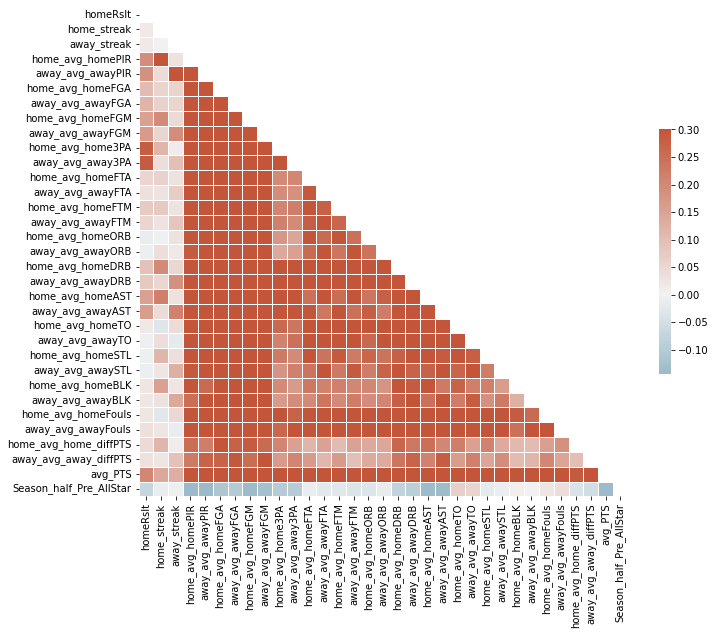

In [224]:
import seaborn as sns
from matplotlib import pyplot as plt

corr = nba_df_for_ML_dumm.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 正規化

In [225]:
# 正規化
from sklearn.preprocessing import MinMaxScaler

X = nba_df_for_ML_dumm.drop('homeRslt',axis = 1)
y = nba_df_for_ML_dumm.homeRslt

scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X= scaler.transform(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.05555556, 0.        , 0.79881306, ..., 0.2125    , 0.84848485,
        0.        ],
       [0.        , 0.04166667, 0.70623145, ..., 0.16666667, 0.89318182,
        0.        ],
       [0.38888889, 0.        , 0.8       , ..., 0.225     , 0.85530303,
        0.        ]])

# 建立大小盤預測模型

In [226]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    shuffle=True
                                                    )

## 1.RandomForestRegressor

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressorModel = RandomForestRegressor()
RandomForestRegressorModel.fit(X_train,y_train)

RandomForestRegressor()

In [228]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np

y_pred = RandomForestRegressorModel.predict(X_test)
print('MSE：',mean_squared_error(y_test,y_pred))
print('MSE(直接计算)：',np.mean((y_test-y_pred)**2))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2:',r2_score(y_test,y_pred))

MSE： 376.2677336493995
MSE(直接计算)： 376.26773364939993
RMSE 19.397621855511037
R2: 0.20784201710583428


In [229]:
print('平均誤差%:',abs(np.array(y_test)-np.array(RandomForestRegressorModel.predict(X_test))).mean()/y_test.mean()*100)
print('平均+/-誤差:',(np.array(y_test)-np.array(RandomForestRegressorModel.predict(X_test))).mean())

平均誤差%: 7.09456769001152
平均+/-誤差: 0.2468447253352792


Text(0.5, 1.0, 'SCORE')

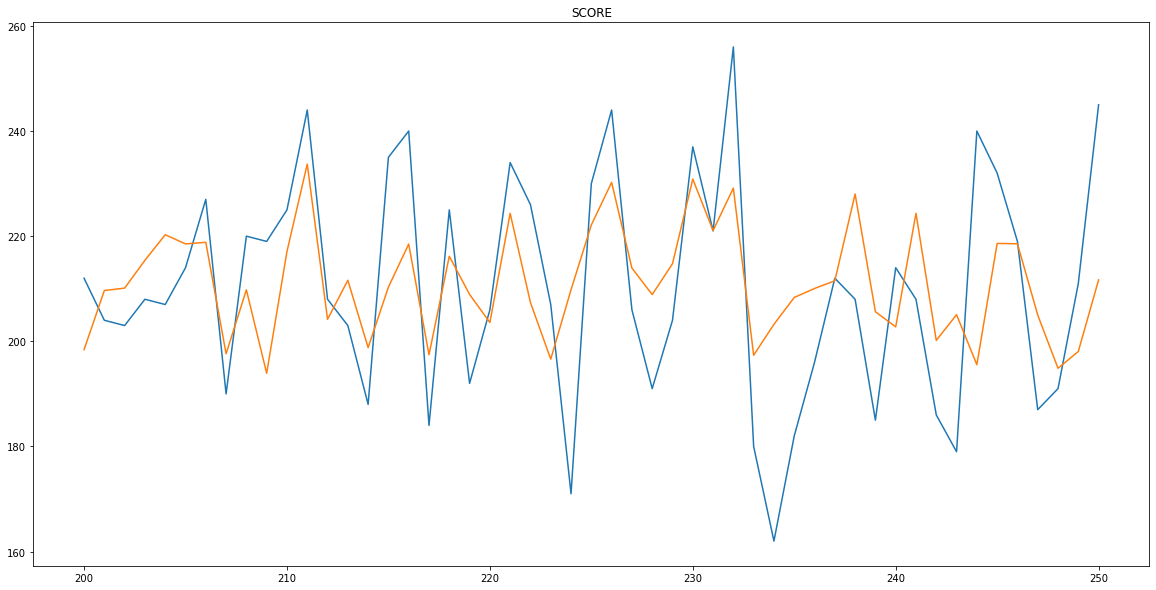

In [230]:
plt.figure(figsize=(20,10))
plt.plot(y_test.reset_index(drop=True).loc[200:250])
plt.plot(pd.DataFrame(RandomForestRegressorModel.predict(X_test)).loc[200:250])
plt.title('SCORE')

## 保存模型

In [231]:
import joblib
#保存模型
joblib.dump(RandomForestRegressorModel, '大小盤_RFG.model')

['大小盤_RFG.model']

# 讀取模型

In [232]:
#读取模型
RandomForestRegressorModel = joblib.load('大小盤_RFG.model')

# 虛擬獲利

In [233]:
nba_df_for_ML = pd.read_csv('nba_df_for_ML(大小盤).csv')
nba_df_for_ML = nba_df_for_ML.set_index('Unnamed: 0',drop=True)
nba_df_for_ML

,homeRslt,gmDate,gmTime,homeAbbr,home_games,awayAbbr,away_games,Season_half,home_streak,away_streak,...,away_avg_awayTO,home_avg_homeSTL,away_avg_awaySTL,home_avg_homeBLK,away_avg_awayBLK,home_avg_homeFouls,away_avg_awayFouls,home_avg_home_diffPTS,away_avg_away_diffPTS,avg_PTS
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,185,2014-10-28,20:00,New Orleans Pelicans,1,Orlando Magic,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201,2014-10-28,20:00,San Antonio Spurs,1,Dallas Mavericks,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,198,2014-10-28,22:30,Los Angeles Lakers,1,Houston Rockets,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,214,2014-10-29,19:00,Charlotte Hornets,1,Milwaukee Bucks,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,194,2014-10-29,19:00,Indiana Pacers,1,Philadelphia 76ers,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,192,2022-01-03,20:30,Dallas Mavericks,37,Denver Nuggets,35,Pre_AllStar,2,3,...,14.6,6.8,8.2,4.4,4.4,21.4,20.4,9.0,8.2,213.2
8403,223,2022-01-03,22:00,Golden State Warriors,36,Miami Heat,38,Pre_AllStar,1,0,...,11.2,10.0,7.2,5.8,3.0,20.6,18.2,8.6,6.4,222.2
8404,267,2022-01-03,22:00,Portland Trail Blazers,36,Atlanta Hawks,36,Pre_AllStar,0,1,...,9.0,6.0,6.0,4.6,4.2,22.6,17.0,16.4,9.0,214.2


In [234]:
import pandas as pd
import pymssql
import pandasql as ps
from datetime import datetime, timezone, timedelta

SourceCode = 'Bet365'  # 台灣運彩編碼
server = "gh.ecocoshiny.com"
database = 'GoHit'
user = 'userLC'
password = '123123Gohit'
TournamentText = 'NBA'

def get_ConnectionFromDB():
    db = pymssql.connect(server, user, password, database)
    cursor = db.cursor()
    return db, cursor

def TeamNameCorrection(Taiwan_TeamName, cursor):
    sql = f"SELECT teams.team FROM teamText join teams on teamText.team_id = teams.id where Text = '{Taiwan_TeamName}' ;"
    cursor.execute(sql)
    result = cursor.fetchone()
    if result:
        print(f'{Taiwan_TeamName}更換名稱為{result[0]}')
        return result[0]
    else:
        return Taiwan_TeamName

import time
def getOddsDataFrame(MatchTime, db, cursor):
    sql = f'''SELECT MatchResults.EventCode,MatchTime,HomeTeam,AwayTeam,HomeScore,AwayScore,Odds.GroupOptionCode,Odds.OptionCode,Odds.OptionRate,Odds.SpecialBetValue
              from MatchResults
              inner join Odds on Odds.EventCode = MatchResults.EventCode
              where TournamentText = '{TournamentText}' and Odds.SourceCode='{SourceCode}' and Odds.GroupOptionCode = 52 AND
                    MatchTime >= '{MatchTime}' order by MatchTime '''

    return pd.read_sql(sql, db)

def get_MatchResults(nba_df_for_ML):
    db, cursor = get_ConnectionFromDB()
    MatchResults = nba_df_for_ML.copy()
    MatchResults['Odd_H'] = 0
    MatchResults['Odd_A'] = 0
    MatchResults['SpecialBetValue'] = 0
    Odds = getOddsDataFrame('2021-10-20 00:00:00', db, cursor)
    for index, game in nba_df_for_ML.iterrows():
        MatchTime =datetime.strptime(game['gmDate']+' '+game['gmTime'], "%Y-%m-%d %H:%M")+timedelta(hours=12)
        if MatchTime <= datetime.strptime('2021-10-20 00:00', "%Y-%m-%d %H:%M"):
            continue
        print(MatchTime)
        HomeTeam = TeamNameCorrection(game['homeAbbr'],cursor)
        AwayTeam = TeamNameCorrection(game['awayAbbr'],cursor)

        offset_sec = 120*60
        timestamp = time.mktime(MatchTime.timetuple())
        top = datetime.fromtimestamp(timestamp+offset_sec)
        bottom = datetime.fromtimestamp(timestamp-offset_sec)

        Odd = Odds[(Odds['MatchTime']>=bottom) & (Odds['MatchTime']<top) & (Odds.HomeTeam==HomeTeam) & (Odds.AwayTeam==AwayTeam)]

        for _,odd in Odd.iterrows():
            if odd['OptionCode'] == 'Over':
                MatchResults.loc[index,'Odd_H'] =odd['OptionRate']
            else:
                MatchResults.loc[index,'Odd_A'] =odd['OptionRate']
            MatchResults.loc[index,'SpecialBetValue'] =odd['SpecialBetValue']

        print(MatchResults.loc[index]['Odd_H'],MatchResults.loc[index]['Odd_A'],MatchResults.loc[index,'SpecialBetValue'])
    cursor.close()
    db.close()
    return MatchResults

In [235]:
MatchResults = get_MatchResults(nba_df_for_ML)
MatchResults

2021-10-20 07:30:00
Milwaukee Bucks更換名稱為MIL Bucks
Brooklyn Nets更換名稱為BKN Nets
1.90 1.90 233.5
2021-10-20 10:00:00
Los Angeles Lakers更換名稱為LA Lakers
Golden State Warriors更換名稱為GS Warriors
1.90 1.90 226.5
2021-10-21 07:00:00
Charlotte Hornets更換名稱為CHA Hornets
Indiana Pacers更換名稱為IND Pacers
1.90 1.90 223.5
2021-10-21 07:00:00
Detroit Pistons更換名稱為DET Pistons
Chicago Bulls更換名稱為CHI Bulls
1.90 1.90 218.5
2021-10-21 07:30:00
New York Knicks更換名稱為NY Knicks
Boston Celtics更換名稱為BOS Celtics
1.90 1.90 216.5
2021-10-21 07:30:00
Toronto Raptors更換名稱為TOR Raptors
Washington Wizards更換名稱為WAS Wizards
1.90 1.90 221.0
2021-10-21 08:00:00
Memphis Grizzlies更換名稱為MEM Grizzlies
Cleveland Cavaliers更換名稱為CLE Cavaliers
1.90 1.90 218.5
2021-10-21 08:00:00
Minnesota Timberwolves更換名稱為MIN Timberwolves
Houston Rockets更換名稱為HOU Rockets
1.90 1.90 231.5
2021-10-21 08:00:00
New Orleans Pelicans更換名稱為NO Pelicans
Philadelphia 76ers更換名稱為PHI 76ers
1.90 1.90 224.0
2021-10-21 08:30:00
San Antonio Spurs更換名稱為SA Spurs
Orlando Magic更換名稱為ORL Mag

,homeRslt,gmDate,gmTime,homeAbbr,home_games,awayAbbr,away_games,Season_half,home_streak,away_streak,...,home_avg_homeBLK,away_avg_awayBLK,home_avg_homeFouls,away_avg_awayFouls,home_avg_home_diffPTS,away_avg_away_diffPTS,avg_PTS,Odd_H,Odd_A,SpecialBetValue
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,185,2014-10-28,20:00,New Orleans Pelicans,1,Orlando Magic,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,201,2014-10-28,20:00,San Antonio Spurs,1,Dallas Mavericks,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,198,2014-10-28,22:30,Los Angeles Lakers,1,Houston Rockets,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,214,2014-10-29,19:00,Charlotte Hornets,1,Milwaukee Bucks,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,194,2014-10-29,19:00,Indiana Pacers,1,Philadelphia 76ers,1,Pre_AllStar,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,192,2022-01-03,20:30,Dallas Mavericks,37,Denver Nuggets,35,Pre_AllStar,2,3,...,4.4,4.4,21.4,20.4,9.0,8.2,213.2,1.90,1.90,213.5
8403,223,2022-01-03,22:00,Golden State Warriors,36,Miami Heat,38,Pre_AllStar,1,0,...,5.8,3.0,20.6,18.2,8.6,6.4,222.2,1.90,1.90,216.5
8404,267,2022-01-03,22:00,Portland Trail Blazers,36,Atlanta Hawks,36,Pre_AllStar,0,1,...,4.6,4.2,22.6,17.0,16.4,9.0,214.2,1.90,1.90,226.0


In [236]:
#刪除nba_df_for_ML觀察用特徵:
nba_df_for_ML_dumm = nba_df_for_ML.drop(['gmDate','gmTime','homeAbbr','home_games','home_avg_homePTS','awayAbbr','away_games','away_avg_awayPTS'],axis=1)
#虛擬變數
nba_df_for_ML_dumm = pd.get_dummies(nba_df_for_ML_dumm)
#Season_half_Post_AllStar
nba_df_for_ML_dumm = nba_df_for_ML_dumm.drop(['Season_half_Post_AllStar'],axis=1)
# 正規化
from sklearn.preprocessing import MinMaxScaler
X = nba_df_for_ML_dumm.drop('homeRslt',axis = 1)
y = nba_df_for_ML_dumm.homeRslt
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X= scaler.transform(X)
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.04166667, 0.63501484, ..., 0.1875    , 0.80830189,
        1.        ],
       [0.05555556, 0.        , 0.68367953, ..., 0.175     , 0.79245283,
        1.        ],
       [0.05555556, 0.20833333, 0.78694362, ..., 0.24166667, 0.86641509,
        1.        ]])

In [480]:
MatchResults.Odd_H = MatchResults.Odd_H.astype('float64')
MatchResults.Odd_A = MatchResults.Odd_A.astype('float64')
MatchResults.SpecialBetValue = MatchResults.SpecialBetValue.astype('float64')

# 取出有賠率的索引
MatchResultsIndex = MatchResults[MatchResults.Odd_H>0][['homeRslt','Odd_H','Odd_A','SpecialBetValue']].index
# 取出預測
MatchResults_pred_y = RandomForestRegressorModel.predict(X[MatchResultsIndex])
# 取出賽果
MatchResults2  = MatchResults.loc[MatchResultsIndex]
# 取出Y
MatchResults_y = y[MatchResultsIndex]

In [481]:
print('平均誤差%:',abs(np.array(MatchResults_y)-MatchResults_pred_y).mean()/y_test.mean()*100)
print('平均+/-誤差:',(np.array(MatchResults_y)-MatchResults_pred_y).mean())


平均誤差%: 7.3881018943989405
平均+/-誤差: 0.02462722732701381


In [489]:
MatchResults2['SpecialBetValue'].std()

6.792654597641589

In [482]:
for i,isOverMean in enumerate(list(MatchResults2['SpecialBetValue'] >= MatchResults2['SpecialBetValue'].mean())):
    if isOverMean:
        MatchResults_pred_y[i] = MatchResults_pred_y[i]-10
    else:
        MatchResults_pred_y[i] = MatchResults_pred_y[i]+10
MatchResults2['ActualIsOver'] = MatchResults2['homeRslt'] > MatchResults2['SpecialBetValue']
MatchResults2['PredIsOver'] = MatchResults_pred_y > MatchResults2['SpecialBetValue']
records = (MatchResults2['ActualIsOver']==MatchResults2['PredIsOver'])
print('準確率:',len(records[records==True])/ len(records))

準確率: 0.49272727272727274


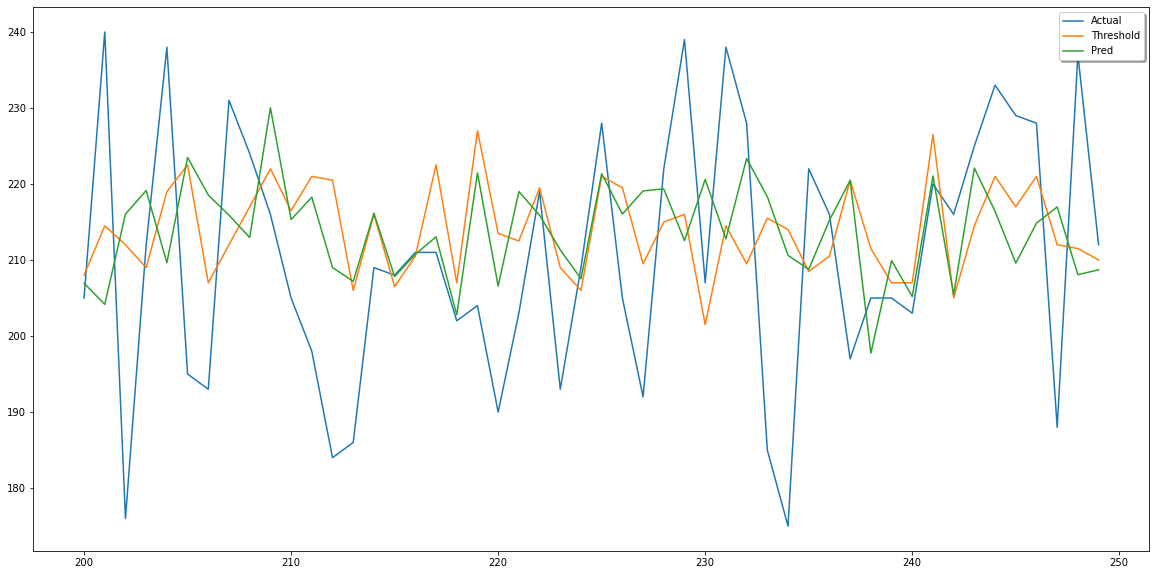

In [483]:
plt.figure(figsize=(20,10))
plt.plot(MatchResults2['homeRslt'].reset_index(drop=True)[200:250], label='Actual')
plt.plot(MatchResults2['SpecialBetValue'].reset_index(drop=True)[200:250], label='Threshold')
plt.plot(pd.Series(MatchResults_pred_y)[200:250] , label='Pred')
plt.legend(loc='upper right', shadow=True)

In [484]:
for index in MatchResults2.index:
    if records.loc[index] == True:
        MatchResults2.loc[index,'profit'] = MatchResults2.loc[index,'Odd_H']*1000-1000
    else:
        MatchResults2.loc[index,'profit'] = -1000

In [485]:
print('虛擬獲利 :',sum(MatchResults2.profit))

虛擬獲利 : -35100.0


C:\Users\xin\AppData\Local\Temp/ipykernel_15548/4015121101.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
C:\Users\xin\AppData\Local\Temp/ipykernel_15548/4015121101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)


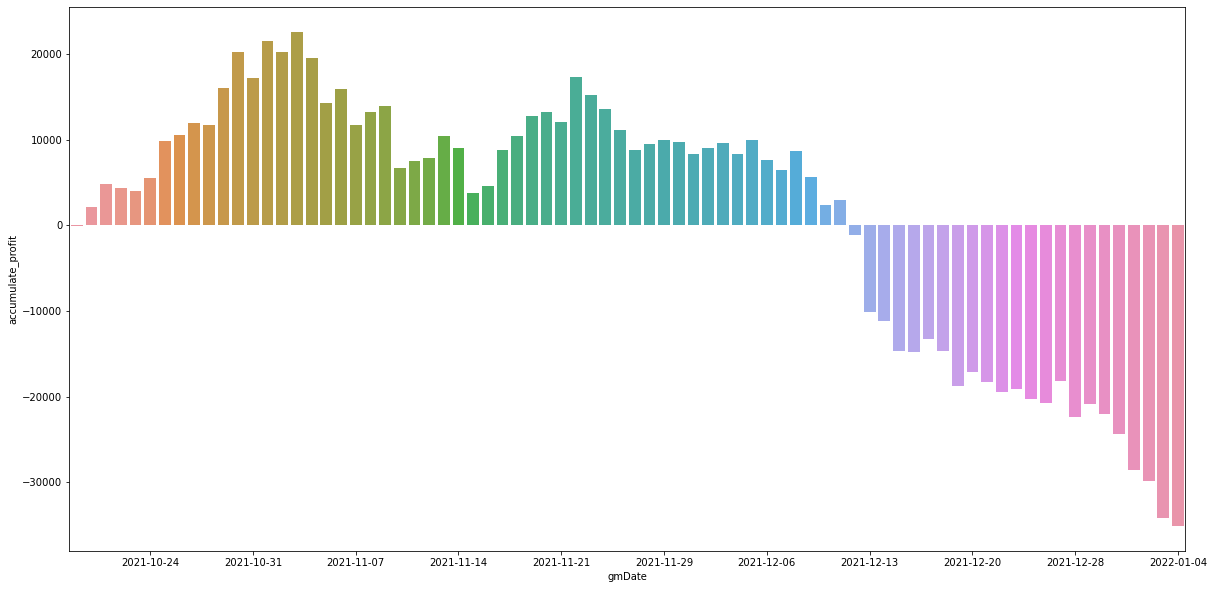

In [486]:
import matplotlib.dates as mdates
import seaborn as sns
# 每天虛擬獲利情形
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
MatchResultsGroup = MatchResults2[['gmDate','profit']]
MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)
MatchResultsGroup = MatchResultsGroup[['gmDate','profit','isMkMoney','gms']].groupby(['gmDate']).sum().reset_index()
MatchResultsGroup['>=50%'] = np.where(MatchResultsGroup['isMkMoney']/MatchResultsGroup['gms'] >= 0.5,'Y','N')
MatchResultsGroup['isMkMoney' ]= MatchResultsGroup.profit.apply(lambda p: 'Y' if p > 0 else 'N')

MatchResultsGroup['accumulate_profit'] = 0
for idx in MatchResultsGroup.index:
    if idx > 0:
        MatchResultsGroup.loc[idx,'accumulate_profit'] = MatchResultsGroup.loc[idx-1,'accumulate_profit']+MatchResultsGroup.loc[idx,'profit']
    else:
        MatchResultsGroup.loc[idx,'accumulate_profit'] = MatchResultsGroup.loc[idx,'profit']

ax = sns.barplot(x='gmDate', y='accumulate_profit', data=MatchResultsGroup)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

In [488]:
MatchResultsGroup

,gmDate,profit,isMkMoney,gms,>=50%,accumulate_profit
0,2021-10-19,-100.0,N,2,Y,-100
1,2021-10-20,2300.0,Y,11,Y,2200
2,2021-10-21,2700.0,Y,3,Y,4900
3,2021-10-22,-500.0,N,10,Y,4400
4,2021-10-23,-400.0,N,8,Y,4000
...,...,...,...,...,...,...
71,2021-12-31,-2400.0,N,10,N,-24400
72,2022-01-01,-4100.0,N,6,N,-28500
73,2022-01-02,-1300.0,N,7,N,-29800
74,2022-01-03,-4300.0,N,10,N,-34100


C:\Users\xin\AppData\Local\Temp/ipykernel_15548/3872322315.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
C:\Users\xin\AppData\Local\Temp/ipykernel_15548/3872322315.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)


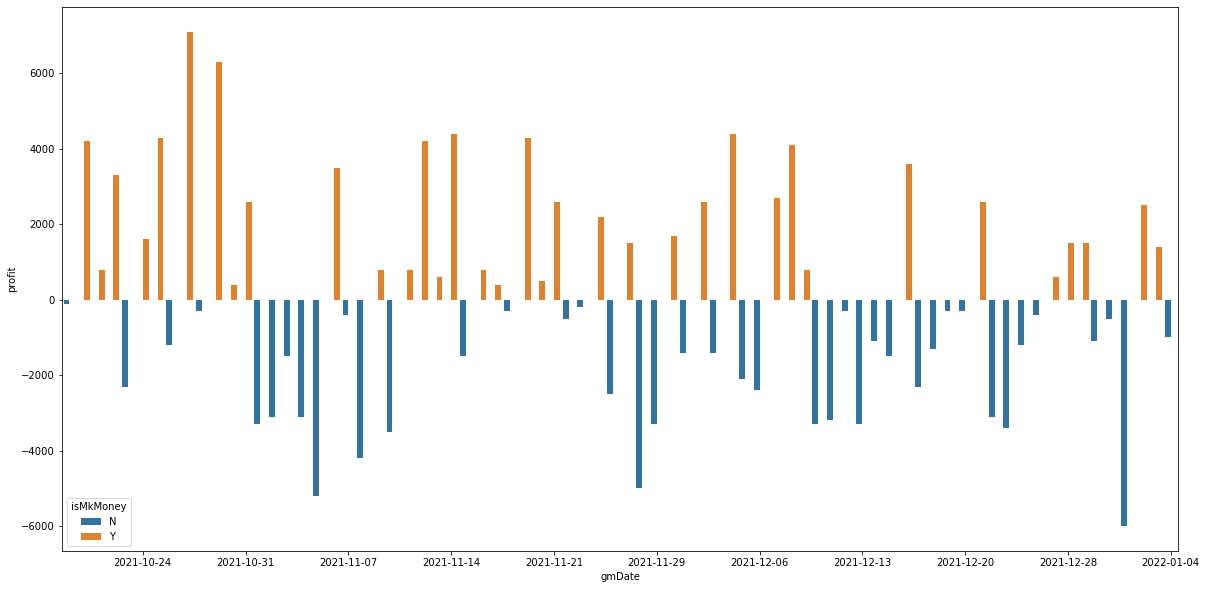

In [476]:
import matplotlib.dates as mdates
import seaborn as sns
# 每天虛擬獲利情形
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
MatchResultsGroup = MatchResults2[['gmDate','profit']]
MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)
MatchResultsGroup = MatchResultsGroup[['gmDate','profit','isMkMoney','gms']].groupby(['gmDate']).sum().reset_index()
MatchResultsGroup['>=50%'] = np.where(MatchResultsGroup['isMkMoney']/MatchResultsGroup['gms'] >= 0.5,'Y','N')
MatchResultsGroup['isMkMoney' ]= MatchResultsGroup.profit.apply(lambda p: 'Y' if p > 0 else 'N')

ax = sns.barplot(x='gmDate', y='profit', data=MatchResultsGroup,hue = 'isMkMoney')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

C:\Users\xin\AppData\Local\Temp/ipykernel_15548/3114824656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
C:\Users\xin\AppData\Local\Temp/ipykernel_15548/3114824656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)


<AxesSubplot:ylabel='>50%'>

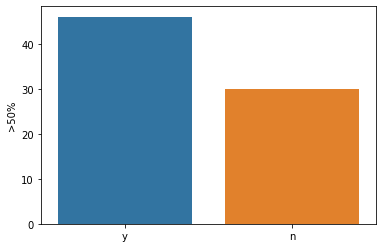

In [477]:
# 計天猜中>50%與<50%總數
MatchResultsGroup = MatchResults2[['gmDate','profit']]
MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)
MatchResultsGroup = MatchResultsGroup[['gmDate','profit','isMkMoney','gms']].groupby(['gmDate']).sum().reset_index()
MatchResultsGroup['>=50%'] = np.where(MatchResultsGroup['isMkMoney']/MatchResultsGroup['gms'] >= 0.5,'Y','N')
MatchResultsGroup['isMkMoney' ]= MatchResultsGroup.profit.apply(lambda p: 'Y' if p > 0 else 'N')

sns.barplot( x =['y','n'] ,y='>50%' ,data = pd.DataFrame({'>50%':[int(MatchResultsGroup[MatchResultsGroup['>=50%']=='Y']['>=50%'].count()),int(MatchResultsGroup[MatchResultsGroup['>=50%']=='N']['>=50%'].count())]}))

C:\Users\xin\AppData\Local\Temp/ipykernel_15548/3443735752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
C:\Users\xin\AppData\Local\Temp/ipykernel_15548/3443735752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)


<AxesSubplot:ylabel='isMkMoney'>

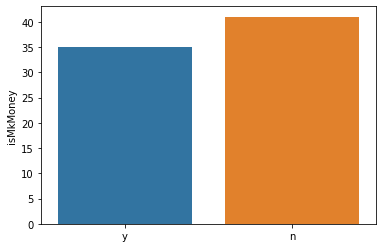

In [478]:
# 計天虛擬獲利>0與<0總數
MatchResultsGroup = MatchResults2[['gmDate','profit']]
MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)
MatchResultsGroup = MatchResultsGroup[['gmDate','profit','isMkMoney','gms']].groupby(['gmDate']).sum().reset_index()
MatchResultsGroup['>=50%'] = np.where(MatchResultsGroup['isMkMoney']/MatchResultsGroup['gms'] >= 0.5,'Y','N')
MatchResultsGroup['isMkMoney' ]= MatchResultsGroup.profit.apply(lambda p: 'Y' if p > 0 else 'N')

sns.barplot( x =['y','n'] ,y='isMkMoney' ,data = pd.DataFrame({'isMkMoney':[int(MatchResultsGroup[MatchResultsGroup['isMkMoney']=='Y']['isMkMoney'].count()),int(MatchResultsGroup[MatchResultsGroup['isMkMoney']=='N']['isMkMoney'].count())]}))

C:\Users\xin\AppData\Local\Temp/ipykernel_15548/2161554215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
C:\Users\xin\AppData\Local\Temp/ipykernel_15548/2161554215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)


<AxesSubplot:ylabel='isMkMoney'>

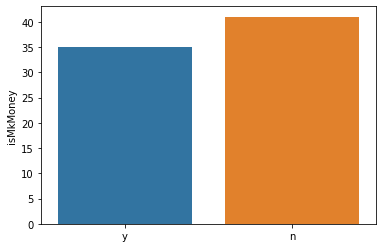

In [479]:
# 計天猜中>50%且虛擬獲利>0總數
MatchResultsGroup = MatchResults2[['gmDate','profit']]
MatchResultsGroup['isMkMoney'] = MatchResultsGroup.profit.apply(lambda p: 1 if p > 0 else 0)
MatchResultsGroup['gms'] = MatchResultsGroup.profit.apply(lambda p: 1)
MatchResultsGroup = MatchResultsGroup[['gmDate','profit','isMkMoney','gms']].groupby(['gmDate']).sum().reset_index()
MatchResultsGroup['>=50%'] = np.where(MatchResultsGroup['isMkMoney']/MatchResultsGroup['gms'] >= 0.5,'Y','N')
MatchResultsGroup['isMkMoney' ]= MatchResultsGroup.profit.apply(lambda p: 'Y' if p > 0 else 'N')

sns.barplot( x =['y','n'] ,y='isMkMoney' ,data = pd.DataFrame({'isMkMoney':[int(MatchResultsGroup[MatchResultsGroup['isMkMoney']=='Y']['isMkMoney'].count()),int(MatchResultsGroup[MatchResultsGroup['isMkMoney']=='N']['isMkMoney'].count())]}))